In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Getting the glass data

In [3]:
column_names = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
data = pd.read_csv("glass.data", index_col=0, names=column_names)

attributes = data[data.columns[:-1]]
classes = data[data.columns[-1]]

data.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>, <Axes: title={'center': 'Al'}>,
        <Axes: title={'center': 'Si'}>],
       [<Axes: title={'center': 'K'}>, <Axes: title={'center': 'Ca'}>,
        <Axes: title={'center': 'Ba'}>, <Axes: title={'center': 'Fe'}>,
        <Axes: title={'center': 'Type'}>]], dtype=object)

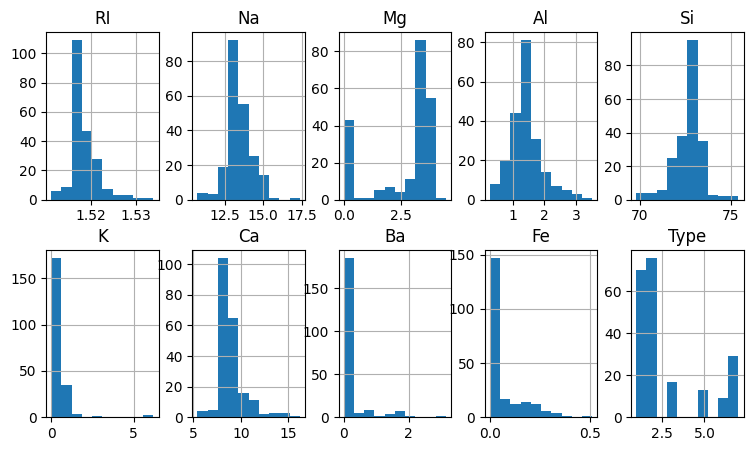

In [5]:
fig, axis = plt.subplots(2, 5, figsize=(9,5))


#create histogram for each column in DataFrame
data.hist(ax=axis)

# Creating training and test set

In [6]:
# Original data
train_set, test_set,  train_classes, test_classes = train_test_split(attributes, classes, test_size=0.9)


# Normalized data - axis=0 normalize each feature
normalized_attributes = normalize(attributes.values, axis=0)
na_train_set, na_test_set, na_train_classes, na_test_classes = train_test_split(normalized_attributes, classes, test_size=0.9)


# Standardized data
scaler = StandardScaler().fit(attributes)

# Using scaler.mean_ we can check if data fit is correct comparing to data.describe() means
# print(scaler.mean_)

standardized_attributes = scaler.transform(attributes)
sa_train_set, sa_test_set, sa_train_classes, sa_test_classes = train_test_split(standardized_attributes, classes, test_size=0.9)

# Classification

## Naive Bayes

In [13]:
nb = GaussianNB()
nb.fit(train_set, train_classes)

nb_normalized = GaussianNB()
nb_normalized.fit(na_train_set, na_train_classes)

nb_standardized = GaussianNB()
nb_standardized.fit(sa_train_set, sa_train_classes)


GaussianNB()

In [14]:
# With hyperparameters

param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb_hyperparameters = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nb_hyperparameters.fit(train_set, train_classes)


y_pred = nb_hyperparameters.predict(test_set)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/home/paro/Pulpit/machine-learning/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


## Decision tree
Helpful website: https://www.section.io/engineering-education/hyperparmeter-tuning/

In [20]:
dt_model = DecisionTreeClassifier(random_state = 13)
dt_model.fit(train_set, train_classes)

dt_model_normalized = DecisionTreeClassifier(random_state = 13)
dt_model_normalized.fit(na_train_set, na_train_classes)

dt_model_standardized = DecisionTreeClassifier(random_state = 13)
dt_model_standardized.fit(sa_train_set, sa_train_classes)

DecisionTreeClassifier(random_state=13)

### Print tree

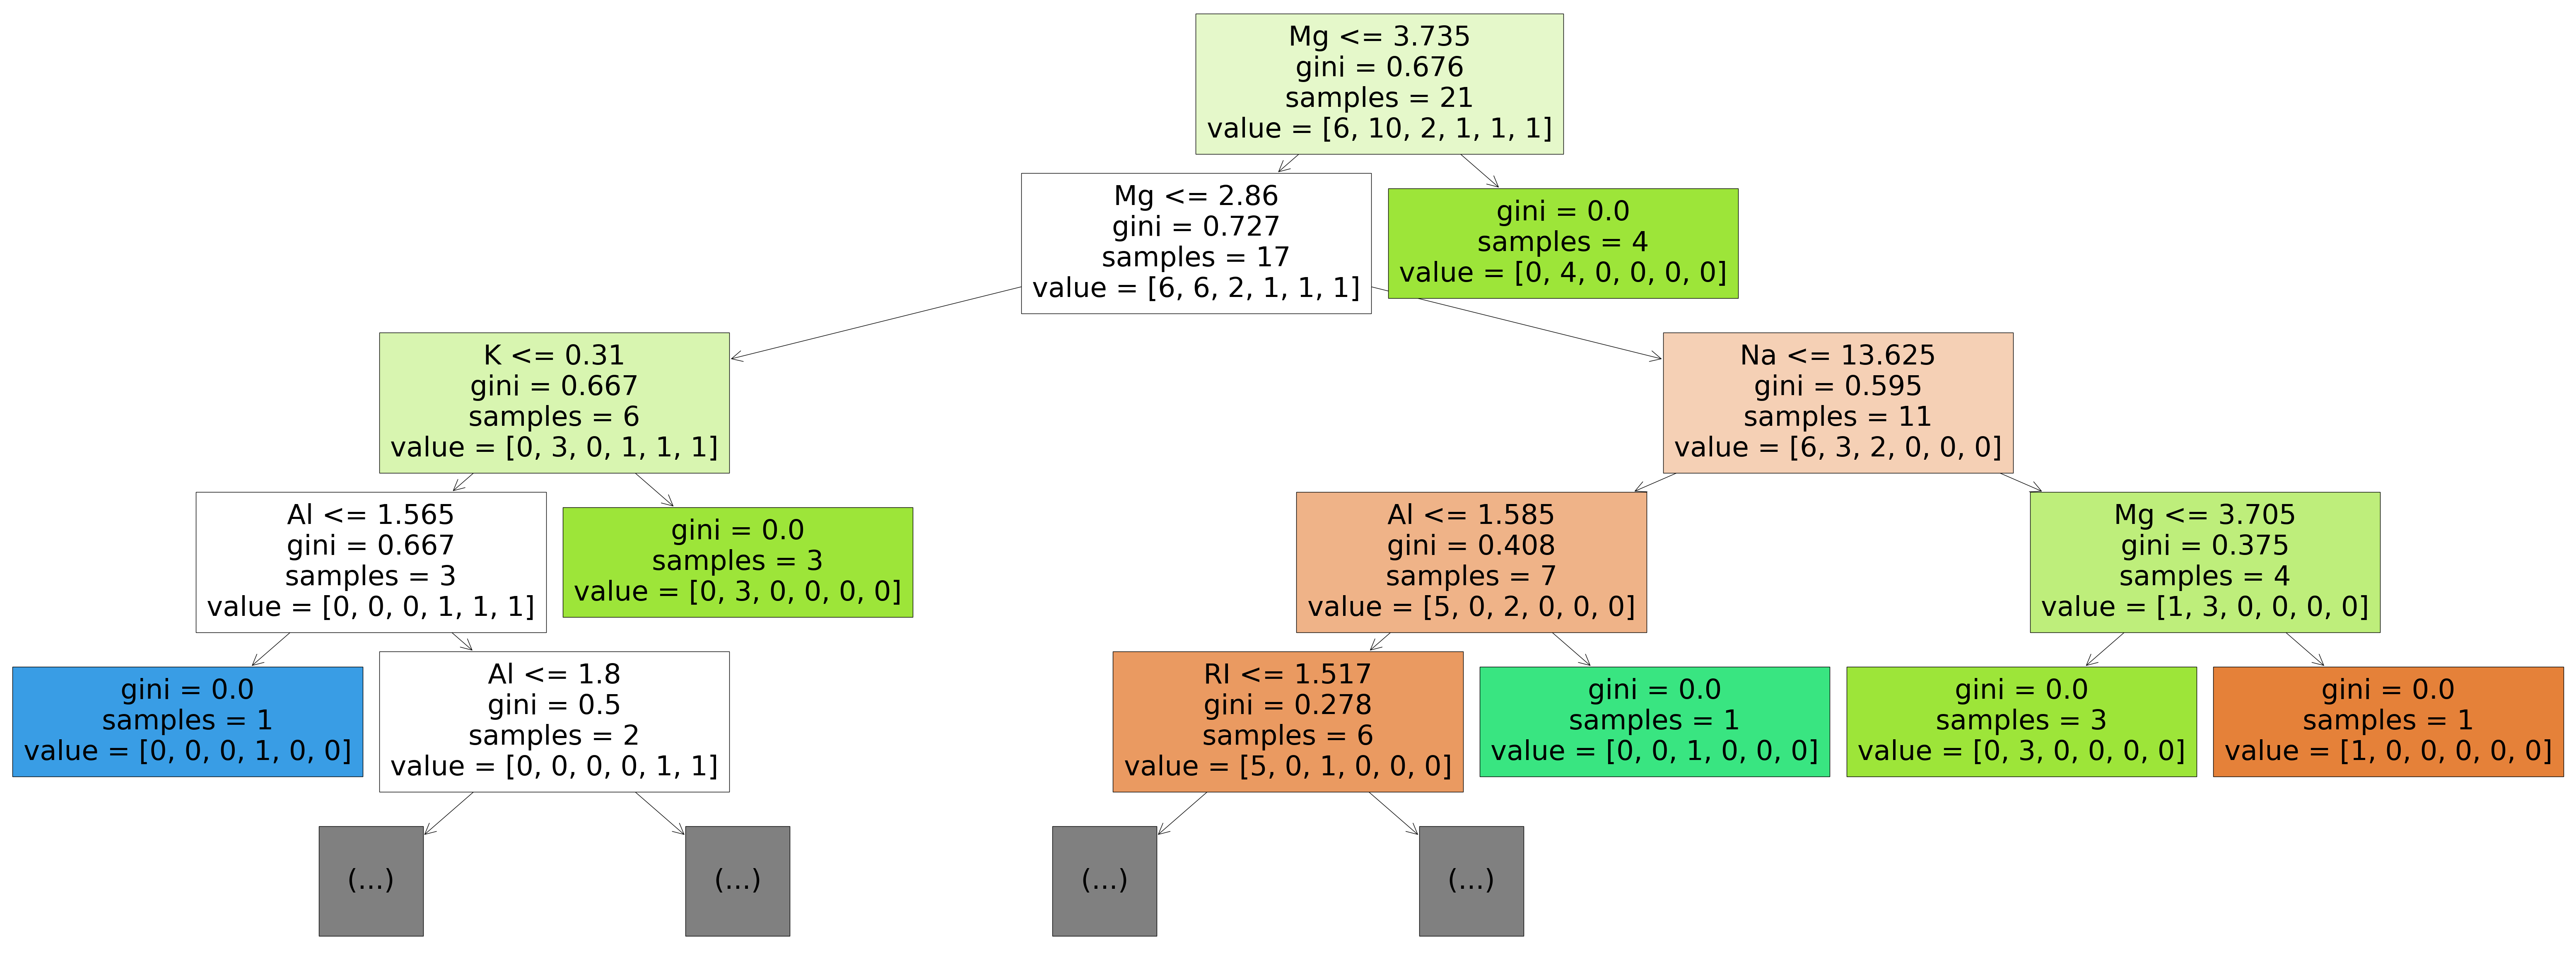

In [19]:
plt.figure(figsize =(80,30))
plot_tree(dt_model, feature_names=train_set.columns, max_depth=4, filled=True);

### Decision tree with different hyperparameters

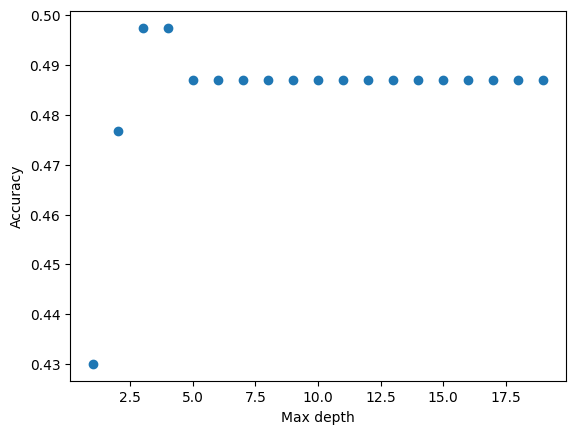

In [88]:
scores = []
for max_d in range(1,20):
  dt = DecisionTreeClassifier(max_depth=max_d, random_state=13)
  dt.fit(train_set, train_classes)
  scores.append(dt.score(test_set,test_classes))

plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.scatter([i for i in range(1,20)], scores)

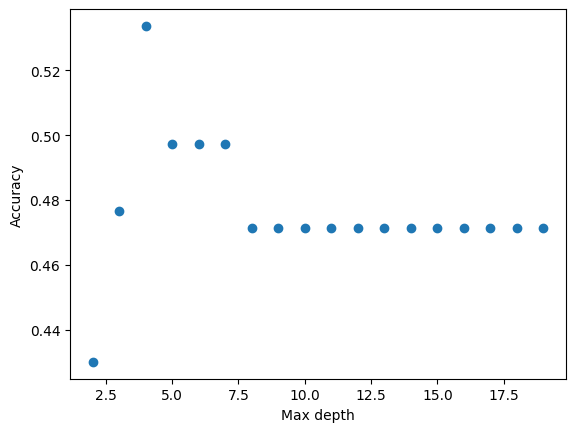

In [89]:
scores = []
for max_l in range(2,20):
  dt = DecisionTreeClassifier(max_leaf_nodes=max_l, random_state=13)
  dt.fit(train_set, train_classes)
  scores.append(dt.score(test_set,test_classes))

plt.xlabel("Max depth")
plt.ylabel("Accuracy")
plt.scatter([i for i in range(2,20)], scores)

In [90]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(train_set, train_classes)

print(f"The Validation Accuracy for entropy criterion is: {dt.score(test_set,test_classes)}")

dt = DecisionTreeClassifier(criterion="gini")
dt.fit(train_set, train_classes)

print(f"The Validation Accuracy for gini criterion is: {dt.score(test_set,test_classes)}")

The Validation Accuracy for entropy criterion is: 0.40932642487046633
The Validation Accuracy for gini criterion is: 0.48186528497409326


# Metrics

In [32]:
nb_predicted = nb.predict(test_set)
nb_normalized_predicted = nb_normalized.predict(na_test_set)
nb_standardized_predicted = nb_standardized.predict(sa_test_set)

dt_model_predicted = dt_model.predict(test_set)
dt_model_normalized_predicted = dt_model_normalized.predict(na_test_set)
dt_model_standardized_predicted = dt_model_standardized.predict(sa_test_set)



results_column_names = ["model", "accuracy"]
results_data = [["Naive Bayes", accuracy_score(test_classes, nb_predicted)], 
                ["Naive Bayes normalized", accuracy_score(na_test_classes, nb_normalized_predicted)], 
                ["Naive Bayes standardized", accuracy_score(sa_test_classes, nb_standardized_predicted)], 
                ["Decision tree", accuracy_score(test_classes, dt_model_predicted)], 
                ["Decision tree normalized", accuracy_score(na_test_classes, dt_model_normalized_predicted)], 
                ["Decision tree standardized", accuracy_score(sa_test_classes, dt_model_standardized_predicted)]
                ]

results_summary = pd.DataFrame(results_data, columns=results_column_names)
print(results_summary)

                        model  accuracy
0                 Naive Bayes  0.404145
1      Naive Bayes normalized  0.575130
2    Naive Bayes standardized  0.507772
3               Decision tree  0.409326
4    Decision tree normalized  0.507772
5  Decision tree standardized  0.347150


In [34]:
confusion_matrix(test_classes, nb_predicted)

array([[27, 27, 11,  0,  0,  1],
       [ 5, 58,  2,  0,  0,  1],
       [ 6,  4,  4,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  1],
       [ 0,  8,  0,  0,  0,  1],
       [ 0,  4,  0,  0,  0, 22]])